In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


Loading Dataset

In [2]:
# Dataset Iris (contoh data bisa langsung dari sklearn atau CSV)
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(
    data = np.c_[iris['data'], iris['target']],
    columns = iris['feature_names'] + ['species']
)
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


Cek Informasi Data

In [3]:
df.info()
df.isnull().sum()
df.duplicated().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


np.int64(1)

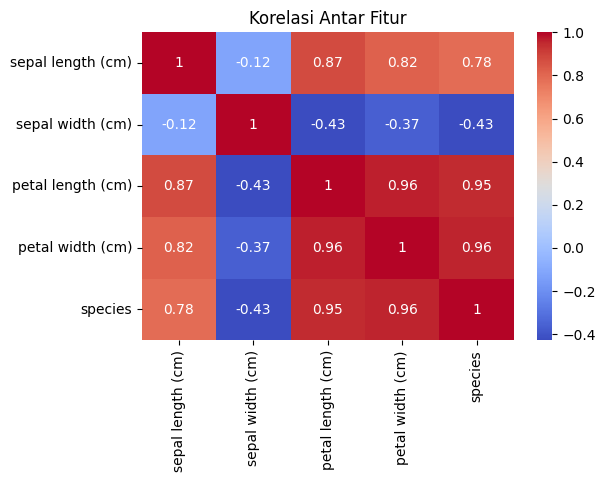

In [10]:
iris = load_iris()
df = pd.DataFrame(
    data = np.c_[iris['data'], iris['target']],
    columns = iris['feature_names'] + ['species']
)

# 2. Hitung korelasi antar fitur
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Antar Fitur')
plt.show()

Pisahkan Fitur dan Target

In [4]:
X = df.iloc[:, :-1]   # fitur
y = df.iloc[:, -1]    # target


Split Data (80% Training, 20% Testing)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


Buat dan Latih Model Decision Tree

In [6]:
model = DecisionTreeClassifier(
    criterion='gini', 
    max_depth=4, 
    random_state=42
)
model.fit(X_train, y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


Evaluasi Model

In [7]:
y_pred = model.predict(X_test)

print("Akurasi Model:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Akurasi Model: 0.9333333333333333

Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       0.90      0.90      0.90        10
         2.0       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



Visualisasi Decision Tree

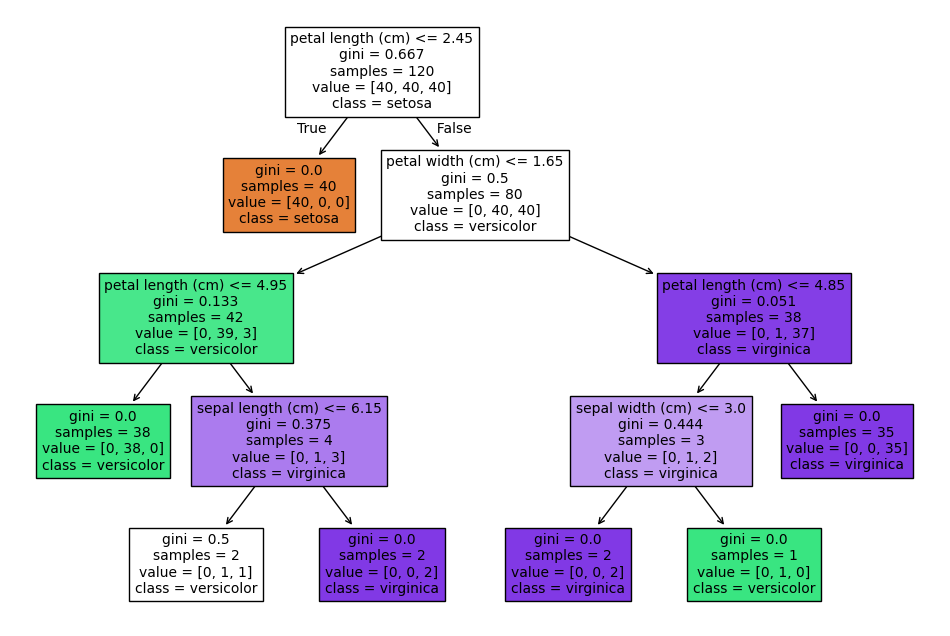

In [8]:
plt.figure(figsize=(12,8))
plot_tree(
    model, 
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    filled=True,
    fontsize=10
)
plt.show()


Analisis Fitur yang Paling Berpengaruh

In [9]:
fi = pd.DataFrame({
    'Feature': iris.feature_names,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)
print(fi)


             Feature  Importance
2  petal length (cm)    0.565639
3   petal width (cm)    0.411154
1   sepal width (cm)    0.016878
0  sepal length (cm)    0.006329
